# The Browm-Okamoto Plot

Hammett parameters express the change in electron dinsity of the benzene ring with substituents. However, para-substituents can have a direct connection via resonance with the developing charge at the reaction centre.  If this happens then we have an additional resonance effect beyond the regular Hammett inductive effect. In this case we use the Brown-Okamoto parameters, $\sigma^+$ or $\sigma^-$

The effect of substituents on the ionization of phenol was used to create the $\sigma^-$ series. Let us consider how substituents affect the rate of phenoxide nucleophiles in reacting with epoxide electrphiles.

The data presented is fromn"The Velocities of Combination of Sodium Derivatives of Phenols with Olefine Oxides.", David R. Boyd \& Ernest R. Marle., *J. Chem. Soc., Trans.*, **1914**, *105*, 2117-2139. https://doi.org/10.1039/CT9140502117

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_15/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

sigmatype = "sigma"          # sigmatype can be one of ["sigma", "s_plus", "s_minus"]

#################################################################
### a function to fill in sigma for empty spaces in s+ and s- ###
#################################################################

def fill_sigma(df):     
    for z in df.index:
        if np.isnan(df.loc[z,"s_plus"]):
            df.loc[z,"s_plus"] = df.loc[z,"sigma"]
        if np.isnan(df["s_minus"][z]):
            df.loc[z,"s_minus"] = df.loc[z,"sigma"]
    return(df)

################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

LFER_file = "LFER_HanschLeoTaft.csv"

df = pd.read_csv(github_location_LFER_tables + LFER_file, 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

########################################################
### Fill across sigma values and select substituents ###
########################################################

df=fill_sigma(df)

rowlist = ["m-Br", "p-Br", "m-CH3", "p-CH3", 
           "m-Cl", "p-Cl", "p-CN", "m-COCH3", 
           "p-COCH3", "m-F", "p-F", "H",
           "m-NO2",  "p-NO2", "m-OCH3", "p-OCH3"]

if False: 
    df = df.loc[rowlist]

### Remove unneeded columns
df2 = df     # copy to new name
df2.drop(labels = ["TABLE V", "TABLE I"],
        axis = 1,
        inplace = True)

df2.sort_values(by=['sigma'], inplace=True)

#print(df2)

In [38]:
############################################
### Read in data from literature example ###
############################################

df = pd.read_csv(github_location + "PhenolNucleophileData_BrownOkamoto.csv", 
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 
#print(df)

In [39]:
#################################################################
### calculate log(k) and import sigma values from data table ###
#################################################################


df["logk"]=np.log10(df["rate_k"])

df["sigma"] =   df2["sigma"]
df["s_plus"] =  df2["s_plus"]
df["s_minus"] = df2["s_minus"]

print(df)

                              Name  rate_k      logk  sigma  s_plus  s_minus
Substituent                                                                 
p-NO2                p-nitrophenol   0.013 -1.886057   0.78    0.79     1.27
p-CN         p-hydroxybenzonitrile   0.026 -1.585027   0.66    0.66     1.00
m-NO2                m-nitrophenol   0.032 -1.494850   0.71    0.71     0.71
m-CN         m-hydroxybenzonitrile   0.044 -1.356547   0.56    0.56     0.56
p-N2C6H5        p-benzeneazophenol   0.050 -1.301030   0.39   -0.19     0.45
m-Cl                m-chlorophenol   0.101 -0.995679   0.37    0.37     0.37
p-Cl                p-chlorophenol   0.108 -0.966576   0.23    0.11     0.19
H                           phenol   0.205 -0.688246   0.00    0.00     0.00
m-CH3                     m-cresol   0.256 -0.591760  -0.07   -0.07    -0.07
p-CH3                     p-cresol   0.257 -0.590067  -0.17   -0.31    -0.17


In [40]:
#####################################################
### Get series of data to plot from the dataframe ###
#####################################################

x = df["s_minus"]
y=  df["logk"]
x1 = df["sigma"]

######################################################################
### get just the meta substituents for the plot with large circles ###
######################################################################

metalist = ["m-CH3", "m-Cl", "m-CN",  "H", "m-NO2"]

df_m = df.loc[metalist]   # get dataframe of just meta subs
ym = df_m["logk"]
xm = df_m["s_minus"]

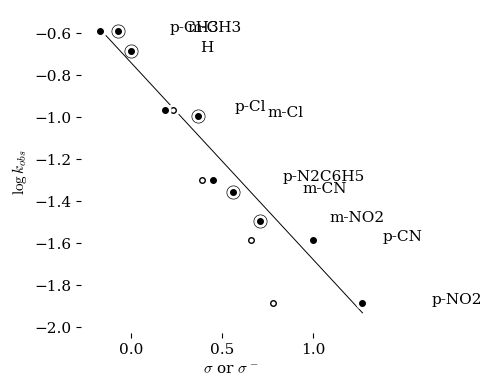

Open circles: sigma, closed circles: s_minus, large circles: meta substituents
Line is for s_minus
slope = -0.9
intercept = -0.741
RSQ = 0.963


In [44]:
from scipy.stats import linregress
import matplotlib

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################

### Plot just the meta substituents as large circle (to highlight them on plot)

ax.scatter(xm,ym, s=64, color="white", edgecolors = 'k', linewidths=2, zorder=3)

### Plot the Hammett plot using sigma-minus values - open circ;e

ax.scatter(x1,y, s=64, color="white", zorder=2)
ax.scatter(x1,y, s=16, color="white", edgecolors = 'k', zorder=3)

### Plot the Hammett plot using regular sigma values - close circles

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="black", zorder=3)

if True:                       # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(x,y)
    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='black', zorder=1, linewidth=0.7)

if False:                       # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(x1,y)   # Line fit for sigma series
    fity = linfit.slope * x1 + linfit.intercept
    ax.plot(x1, fity, color='black', zorder=1, linewidth=0.7)


############################
### Set labels and scale ###
############################

ax.set(
#    title="Initial Rate Log-Log Plot",       
          ylabel=r"$\log{k_{obs}}$", 
          xlabel=r"$\sigma$ or $\sigma^-$",                
#          xlim=[-.9,.9],                  
#          ylim=[-1,7]
         )



if False:    # Flag to run or not. True = run this section, False = skip it
    for name,x_place,y_place in zip(list(df.index),x,y):
        plt.annotate(name, # this is the text
                    (x_place,y_place), # these are the coordinates to position the label
                    textcoords="offset points", # how to position the text
                    xytext=(30,0), # distance from text to points (x,y)
                    ha='left') # horizontal alignment can be left, right or center


############################
### Print labels on plot ###
############################

if True:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),          # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(50,-0),  # distance from text to points (x,y)
                 ha='left')      # horizontal alignment can be left, right or center

#fig.savefig("plot2.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

#make_axes_area_auto_adjustable(ax)
#####################################
### Print the line fit parameters ###
#####################################

print("Open circles: sigma, closed circles: s_minus, large circles: meta substituents")
print("Line is for s_minus")
print(f"slope = {linfit.slope:0.1f}")
print(f"intercept = {linfit.intercept:0.3f}")
print(f"RSQ = {(linfit.rvalue**2):0.3f}")

## Discussion

I read the paper and see that the reaction is carried out in Ethanol/sodium ethoxide as solvent. Excess phenol is added and a known concentration of sodium ethoxide established. This will be the concentration of phenoxide and phenol is much, much more acidic than ethanol.

The Hammett reaction constant, $\rho$, for the ionization of phenol is +2.4.  than means that the process of going from thenoxide to phenol would be $\rho = -2.4$.  We observe $\rho = -0.9$ for phenolxide forming a bond with ethylene oxide. If the negative charge was fully neutralized in the t.s. the we would expect a $\rho$ near -2.4.  the value of 0.9 indicates that the negative charge is **partially neutralized** at the t.s., as expected in a $S_N1$ reaction.

[The $\rho$ value for phenol ionization was found in "A Reexamination of the Hammett Equation", H.H. Jaffe, *Chem. Rev.*, **1953**, *53*, 191-261. https://doi.org/10.1021/cr60165a003 ]